In [ ]:
import pickle
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Binarizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set the path to the pickled file
#path = '/content/drive/MyDrive/Group 1/Stemmed.pkl'

path = '/content/drive/MyDrive/Group 1 - Text Analytics/Class/drive-download-20230324T134613Z-001 (1).zip (Unzipped Files)/Stemmed.pkl'

##'/content/drive/MyDrive/Group 1/Stemmed.pkl' TK's path

# open the file for reading in binary mode
with open(path, 'rb') as file:
    data = pickle.load(file)

# print data as string
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Bag-of-words (sklearn)

In [ ]:
# Bag of Words
# Absolute frequency
cvec = CountVectorizer(max_df=0.95, min_df=0.05)
data_count_cvec = cvec.fit_transform(data)
print("CountVectorizer " + str(data_count_cvec.shape[0]))

# Relative frequency
tvec = TfidfVectorizer(max_df=0.95, min_df=0.05,use_idf=False, norm='l1')
data_absolute_tvec = tvec.fit_transform(data)
print("TfidfVectorizer 1" + str(data_absolute_tvec.shape[0]))

# Relative frequency - no smooth
tvec2 = TfidfVectorizer(max_df=0.95, min_df=0.05, smooth_idf=False)
data_tfidf_tvec2 = tvec2.fit_transform(data)
print("TfidfVectorizer 2" + str(data_tfidf_tvec2.shape[0]))


CountVectorizer 11314
TfidfVectorizer 111314
TfidfVectorizer 211314


The difference between tvec and tvectwo lies in the parameters use_idf, smooth_idf, and norm.

tvec has use_idf=False, which means that inverse-document-frequency reweighting is not enabled. Instead of using the term frequency-inverse document frequency (tf-idf) weighting scheme, it uses only the term frequency (tf) weighting scheme. The norm parameter is set to 'l1', which means that the sum of absolute values of vector elements is 1.

On the other hand, tvectwo has smooth_idf=False, which means that idf weights are not smoothed by adding one to document frequencies. This can prevent zero divisions. The norm parameter is not specified, so it takes the default value of 'l2', which means that the sum of squares of vector elements is 112.

In [ ]:
#print(data_count)

In [ ]:
len(tvec2.get_feature_names_out())

309

In [ ]:
len(cvec.get_feature_names_out())

309

In [ ]:
len(tvec.get_feature_names_out())

309

In [ ]:
# Check what happens when max_df and min_df change
tvec2 = TfidfVectorizer(max_df=0.65, min_df=0.35, smooth_idf=False)
data_count = tvec2.fit_transform(data)
print("TfidfVectorizer 2" + str(data_count.shape[0]))
len(tvec2.get_feature_names_out())
tvec2.get_feature_names_out()

TfidfVectorizer 211314


array(['articl', 'edu', 'not', 'on', 'would', 'write'], dtype=object)

Anh's answer:

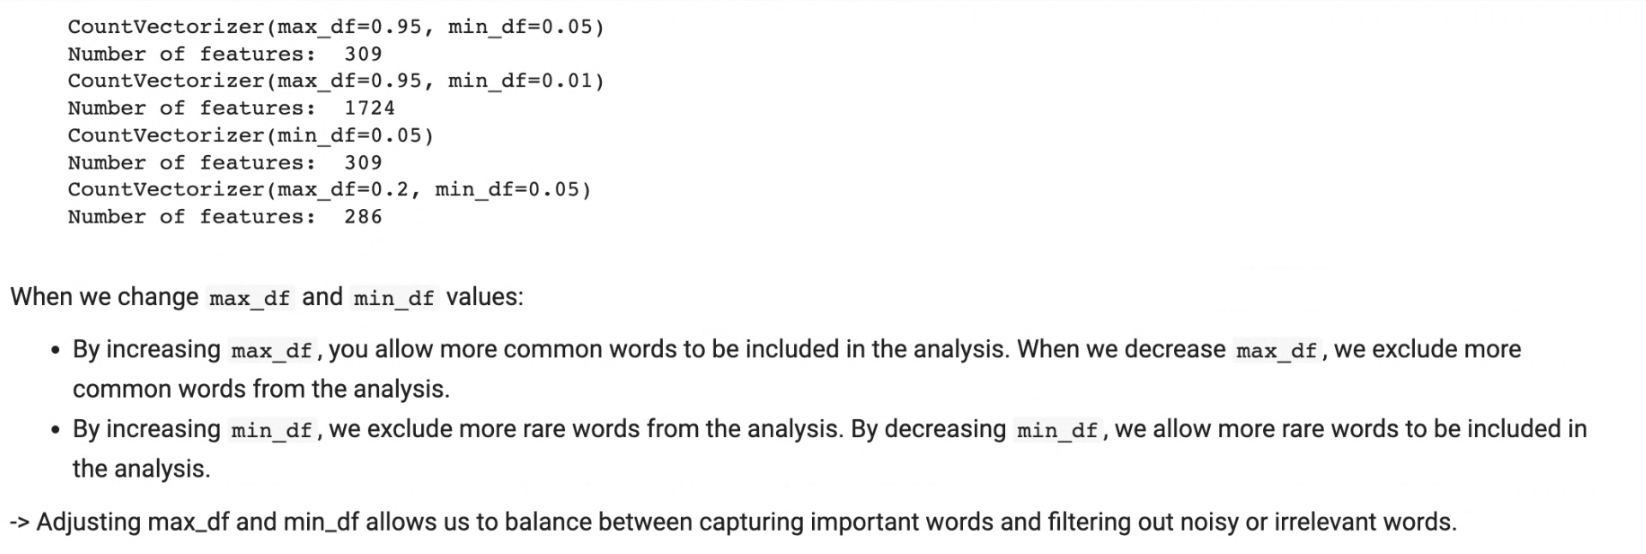

max_df and min_df are parameters of TfidfVectorizer that control the maximum and minimum document frequency of terms.

max_df is used for removing terms that appear too frequently. For example, max_df=0.50 means “ignore terms that appear in more than 50% of the documents”. max_df=25 means “ignore terms that appear in more than 25 documents”. The default value of max_df is 1.0, which means “ignore terms that appear in more than 100% of the documents”. Thus, the default setting does not ignore any terms.

min_df, on the other hand, is used for removing terms that appear too infrequently. For example, min_df=0.01 means “ignore terms that appear in less than 1% of the documents”. min_df=5 means “ignore terms that appear in less than 5 documents”. The default value of min_df is 1, which means “ignore terms that appear in less than 1 document”. Thus, the default setting does not ignore any terms1.

If you change the values of max_df and min_df, you will change the range of document frequencies that are considered when building the vocabulary of terms. This can affect the number of features generated by the vectorizer and the content of the feature matrix.

In [ ]:
# Apply Binarizer() to the result from a.i. (CountVectorizer)
binarizer = Binarizer()

data_count_cvec_bi = binarizer.fit_transform(data_count_cvec)
#print(data_count_cvec_bi)

When you apply Binarizer() to the result from CountVectorizer (a. i.), you are converting the token counts in the document-term matrix into a binary form. In this binary matrix, a 1 indicates the presence of a word in a document, and a 0 indicates the absence of the word.

The result of applying Binarizer() to the CountVectorizer output can be interpreted as a document-term matrix where each entry represents whether a word is present (1) or not (0) in the corresponding document.

Thats why we only have "1"s


** Pros:**

*   Simplicity: easier to understand and interpret.
* Dimensionality reduction: reduce the dimensionality of the data by transforming continuous or count-based values into binary values.
* Focus on word presence: emphasizes whether a word is present in a document or not, which might be helpful in some specific use cases (e.g., presence of specific keywords).

**Cons:**

* Loss of information: By converting token counts into binary values, you lose the information about the frequency of words in the documents, which might be valuable for some machine learning algorithms or text analysis tasks.
* Less sensitive to word importance: The binary representation doesn't account for the importance of words within the documents or across the entire corpus, unlike approaches like TF-IDF.


In [ ]:
#print(data_count_tvectwo[:, 1])
#print(data_count_tvectwo[:, 1][0])
#type(data_count_tvectwo)

### Summary

In [ ]:
# Convert matrix to array
cvec_array = data_count_cvec.toarray()
tvec_array = data_absolute_tvec.toarray()
tvectwo_array = data_tfidf_tvec2.toarray()
cvec_bi_array = data_count_cvec_bi.toarray()

# Put arrays into dataframe
df_sklearn = pd.DataFrame({
    'keys': cvec.get_feature_names_out(),
    'absolute_skl': cvec_array[0],
    'tfidf_skl': tvec_array[0],
    'tfidf_no_smooth_skl': tvectwo_array[0],
    'binary_skl': cvec_bi_array[0]
})

df_sklearn.head()

,keys,absolute_skl,tfidf_skl,tfidf_no_smooth_skl,binary_skl
0,abl,0,0.0,0.0,0
1,accept,0,0.0,0.0,0
2,actual,0,0.0,0.0,0
3,address,0,0.0,0.0,0
4,advanc,0,0.0,0.0,0


In [ ]:
df_sklearn.info

<bound method DataFrame.info of         keys  absolute_skl  tfidf_skl  tfidf_no_smooth_skl  binary_skl
0        abl             0   0.000000             0.000000           0
1     accept             0   0.000000             0.000000           0
2     actual             0   0.000000             0.000000           0
3    address             0   0.000000             0.000000           0
4     advanc             0   0.000000             0.000000           0
..       ...           ...        ...                  ...         ...
304    wrong             0   0.000000             0.000000           0
305    wrote             0   0.000000             0.000000           0
306       ye             0   0.000000             0.000000           0
307     year             1   0.041667             0.113801           1
308      yet             0   0.000000             0.000000           0

[309 rows x 5 columns]>

In [ ]:
# Keep only those rows of the data frame with keys representing words that exist in the first document.
df_sklearn = df_sklearn[df_sklearn['absolute_skl'] > 0]
df_sklearn.head(10)

,keys,absolute_skl,tfidf_skl,tfidf_no_smooth_skl,binary_skl
15,anyon,2,0.083333,0.225371,1
38,call,1,0.041667,0.121811,1
40,car,5,0.208333,0.794661,1
59,could,1,0.041667,0.108609,1
62,dai,1,0.041667,0.130848,1
77,engin,1,0.041667,0.160590,1
128,info,1,0.041667,0.161798,1
139,know,1,0.041667,0.090921,1
155,look,2,0.083333,0.221082,1
159,made,1,0.041667,0.139064,1


In [ ]:
# Sort dataframe (desc) on TF-IDF Frequencies
df_sklearn.sort_values(by=['tfidf_skl'],ascending=False)

,keys,absolute_skl,tfidf_skl,tfidf_no_smooth_skl,binary_skl
40,car,5,0.208333,0.794661,1
15,anyon,2,0.083333,0.225371,1
155,look,2,0.083333,0.221082,1
161,mail,1,0.041667,0.130023,1
298,wonder,1,0.041667,0.158632,1
269,thank,1,0.041667,0.113945,1
249,small,1,0.041667,0.165082,1
223,realli,1,0.041667,0.124242,1
204,pleas,1,0.041667,0.120538,1
178,name,1,0.041667,0.142461,1


In [ ]:
# Sort dataframe (desc) on TF-IDF Frequencies
df_sklearn.sort_values(by=['absolute_skl'],ascending=False)

,keys,absolute_skl,tfidf_skl,tfidf_no_smooth_skl,binary_skl
40,car,5,0.208333,0.794661,1
15,anyon,2,0.083333,0.225371,1
155,look,2,0.083333,0.221082,1
161,mail,1,0.041667,0.130023,1
298,wonder,1,0.041667,0.158632,1
269,thank,1,0.041667,0.113945,1
249,small,1,0.041667,0.165082,1
223,realli,1,0.041667,0.124242,1
204,pleas,1,0.041667,0.120538,1
178,name,1,0.041667,0.142461,1


*Do you see any differences? Why?*
There is no difference. Dictionary won't change. We should have the same features regardless of what values they are assigned to.

# Bag-of-words (gensim)

**corpus_gen** is created by splitting the whole document into words / tokens -> each document is represented as a list of words / tokens

In [ ]:
# Generate a corpus from the preprocessed data
corpus_gen=[doc.split() for doc in data]
corpus_gen

[['car',
  'wonder',
  'anyon',
  'could',
  'enlighten',
  'car',
  'saw',
  'dai',
  'door',
  'sport',
  'car',
  'look',
  'late',
  'earli',
  'call',
  'bricklin',
  'door',
  'realli',
  'small',
  'addit',
  'front',
  'bumper',
  'separ',
  'rest',
  'bodi',
  'know',
  'anyon',
  'tellm',
  'model',
  'name',
  'engin',
  'spec',
  'year',
  'product',
  'car',
  'made',
  'histori',
  'whatev',
  'info',
  'funki',
  'look',
  'car',
  'pleas',
  'mail',
  'thank'],
 ['clock',
  'poll',
  'final',
  'call',
  'final',
  'call',
  'clock',
  'report',
  'acceler',
  'clock',
  'upgrad',
  'fair',
  'number',
  'brave',
  'soul',
  'upgrad',
  'clock',
  'oscil',
  'share',
  'experi',
  'poll',
  'pleas',
  'send',
  'brief',
  'messag',
  'detail',
  'experi',
  'procedur',
  'top',
  'speed',
  'attain',
  'cpu',
  'rate',
  'speed',
  'add',
  'card',
  'adapt',
  'heat',
  'sink',
  'hour',
  'usag',
  'per',
  'dai',
  'floppi',
  'disk',
  'function',
  'floppi',
  'esp

In [ ]:
# Create a gensim Dictionary which represents a mapping between tokens and their IDs
id2word = Dictionary(corpus_gen)
# Filter tokens from a dictionary based on their frequency in the text corpus
id2word.filter_extremes(no_below=566, no_above=0.95)

This method removes rare words (words that appear in less than 5% of documents) and very common words that appear in more than 95% of the documents

In [ ]:
# Print feature IDs
print(id2word.token2id)

{'anyon': 0, 'call': 1, 'car': 2, 'could': 3, 'dai': 4, 'engin': 5, 'info': 6, 'know': 7, 'look': 8, 'made': 9, 'mail': 10, 'name': 11, 'pleas': 12, 'realli': 13, 'small': 14, 'thank': 15, 'wonder': 16, 'year': 17, 'answer': 18, 'base': 19, 'card': 20, 'done': 21, 'edu': 22, 'experi': 23, 'final': 24, 'gui': 25, 'messag': 26, 'next': 27, 'number': 28, 'report': 29, 'send': 30, 'two': 31, 'actual': 32, 'advanc': 33, 'anybodi': 34, 'around': 35, 'back': 36, 'better': 37, 'bit': 38, 'comput': 39, 'email': 40, 'expect': 41, 'feel': 42, 'get': 43, 'good': 44, 'got': 45, 'great': 46, 'heard': 47, 'help': 48, 'life': 49, 'like': 50, 'line': 51, 'machin': 52, 'make': 53, 'mayb': 54, 'might': 55, 'much': 56, 'new': 57, 'on': 58, 'opinion': 59, 'peopl': 60, 'plai': 61, 'post': 62, 'price': 63, 'probabl': 64, 'question': 65, 'rather': 66, 'read': 67, 'real': 68, 'recent': 69, 'sinc': 70, 'start': 71, 'take': 72, 'time': 73, 'us': 74, 'wai': 75, 'well': 76, 'address': 77, 'articl': 78, 'chip': 79,

In [ ]:
# Print unique words or tokens present in a vocabulary (feature names?)
print(id2word.token2id.keys())

dict_keys(['anyon', 'call', 'car', 'could', 'dai', 'engin', 'info', 'know', 'look', 'made', 'mail', 'name', 'pleas', 'realli', 'small', 'thank', 'wonder', 'year', 'answer', 'base', 'card', 'done', 'edu', 'experi', 'final', 'gui', 'messag', 'next', 'number', 'report', 'send', 'two', 'actual', 'advanc', 'anybodi', 'around', 'back', 'better', 'bit', 'comput', 'email', 'expect', 'feel', 'get', 'good', 'got', 'great', 'heard', 'help', 'life', 'like', 'line', 'machin', 'make', 'mayb', 'might', 'much', 'new', 'on', 'opinion', 'peopl', 'plai', 'post', 'price', 'probabl', 'question', 'rather', 'read', 'real', 'recent', 'sinc', 'start', 'take', 'time', 'us', 'wai', 'well', 'address', 'articl', 'chip', 'com', 'far', 'inform', 'person', 'phone', 'point', 'pretti', 'requir', 'stuff', 'system', 'thing', 'write', 'wrote', 'alreadi', 'check', 'mean', 'possibl', 'right', 'see', 'set', 'softwar', 'tell', 'understand', 'world', 'ye', 'yet', 'agre', 'allow', 'anoth', 'apr', 'believ', 'cannot', 'come', 'co

In [ ]:
# Count frequencies of words in documents
print(id2word.dfs)

{2: 697, 16: 702, 0: 2098, 3: 2312, 4: 1361, 8: 2208, 1: 1688, 13: 1593, 14: 602, 7: 3524, 11: 1032, 5: 670, 17: 2043, 9: 1119, 6: 651, 12: 1740, 10: 1388, 15: 2036, 24: 576, 29: 601, 28: 1174, 23: 627, 30: 740, 26: 819, 20: 703, 27: 817, 31: 1806, 19: 895, 21: 787, 18: 767, 25: 595, 22: 5726, 65: 1775, 76: 2211, 71: 1229, 49: 725, 75: 2218, 36: 1483, 57: 2924, 52: 609, 38: 1002, 54: 806, 34: 567, 41: 581, 47: 726, 53: 2662, 70: 1519, 63: 613, 51: 990, 50: 3848, 58: 4466, 69: 629, 64: 1116, 45: 1223, 66: 864, 42: 705, 56: 1971, 37: 1215, 46: 965, 44: 2334, 59: 1059, 60: 2549, 74: 3929, 72: 1804, 43: 3555, 68: 928, 61: 769, 35: 1050, 39: 1044, 32: 1095, 55: 1328, 48: 1621, 33: 650, 40: 775, 62: 1800, 67: 1488, 73: 2822, 92: 808, 91: 6081, 78: 4988, 79: 582, 81: 958, 88: 571, 86: 651, 87: 729, 85: 1570, 77: 632, 84: 716, 82: 1112, 80: 3759, 89: 1607, 90: 2070, 83: 1244, 103: 1023, 104: 772, 93: 662, 95: 1484, 102: 729, 100: 824, 94: 650, 97: 1852, 105: 778, 99: 990, 96: 1206, 101: 1210, 

In [ ]:
# Convert each document in the corpus into a BoW representation
# Count the frequencies of each token in the document -> Absolute frequency
corpus1=[id2word.doc2bow(doc) for doc in corpus_gen]

In [ ]:
# Convert the first document into a BoW representation
# Relative term frequency
corpus2=[[(token[0],(token[1]/sum(n for _, n in doc))) for token in doc] for doc in corpus1]

# "_, n" to get second part of tuple (n) and ignore the first element

In [ ]:
# Binary
corpus3=[[(token[0],1) for token in doc] for doc in corpus1]

In [ ]:
# TF-IDF
tfidf=TfidfModel(dictionary=id2word, normalize=True) 
corpus4=[tfidf[id2word.doc2bow(doc)] for doc in corpus_gen]

### Summary

In [ ]:
# Put arrays into dataframe
df_gensim = pd.DataFrame({
    'keys': None,
    'absolute_gs': corpus1[0],
    'relative_gs': corpus2[0],
    'binary_gs': corpus3[0],
    'tfidf_gs': corpus4[0]
})

df_gensim['keys'] = df_gensim.index.map(lambda x: id2word[x] if x in id2word else None)
df_gensim.reset_index(drop=True, inplace=True)
df_gensim['binary_gs'] = df_gensim['binary_gs'].apply(lambda x: x[1])
df_gensim['tfidf_gs'] = df_gensim['tfidf_gs'].apply(lambda x: x[1])
df_gensim['absolute_gs'] = df_gensim['absolute_gs'].apply(lambda x: x[1])
df_gensim['relative_gs'] = df_gensim['relative_gs'].apply(lambda x: x[1])
df_gensim

,keys,absolute_gs,relative_gs,binary_gs,tfidf_gs
0,anyon,2,0.083333,1,0.198107
1,call,1,0.041667,1,0.111836
2,car,5,0.208333,1,0.819153
3,could,1,0.041667,1,0.093344
4,dai,1,0.041667,1,0.124493
5,engin,1,0.041667,1,0.166153
6,info,1,0.041667,1,0.167844
7,know,1,0.041667,1,0.068568
8,look,2,0.083333,1,0.192099
9,made,1,0.041667,1,0.136002


### Comparison

In [ ]:
merged_df = pd.merge(df_sklearn, df_gensim, on=['keys'])
merged_df = merged_df[['keys', 'tfidf_skl', 'relative_gs', 'tfidf_no_smooth_skl','tfidf_gs', 'binary_skl', 'binary_gs']]
merged_df

,keys,tfidf_skl,relative_gs,tfidf_no_smooth_skl,tfidf_gs,binary_skl,binary_gs
0,anyon,0.083333,0.083333,0.225371,0.198107,1,1
1,call,0.041667,0.041667,0.121811,0.111836,1,1
2,car,0.208333,0.208333,0.794661,0.819153,1,1
3,could,0.041667,0.041667,0.108609,0.093344,1,1
4,dai,0.041667,0.041667,0.130848,0.124493,1,1
5,engin,0.041667,0.041667,0.160590,0.166153,1,1
6,info,0.041667,0.041667,0.161798,0.167844,1,1
7,know,0.041667,0.041667,0.090921,0.068568,1,1
8,look,0.083333,0.083333,0.221082,0.192099,1,1
9,made,0.041667,0.041667,0.139064,0.136002,1,1


Where do you think that the differences come from?

# Ngrams

In [ ]:
cvec = CountVectorizer(ngram_range=(2, 2), max_df=0.95, min_df=0.05)
ngram_data =  cvec.fit_transform(data)
print(cvec.get_feature_names_out())

['articl apr' 'edu write' 'would like' 'write articl']


In [ ]:
# Change max_df and min_df
cvec2 = CountVectorizer(ngram_range=(2, 2), max_df=0.85, min_df=0.01)
ngram_data2 =  cvec2.fit_transform(data)
print(cvec2.get_feature_names_out())

['andrew cmu' 'answer question' 'anybodi know' 'anyon els' 'anyon know'
 'appl com' 'apr atho' 'apr gmt' 'articl apr' 'ask question' 'atho rutger'
 'att com' 'berkelei edu' 'caltech edu' 'clipper chip' 'cmu edu'
 'com write' 'comput scienc' 'could not' 'cso uiuc' 'cwru edu' 'edu david'
 'edu write' 'edu wrote' 'even though' 'everi dai' 'first time' 'ftp site'
 'gmt articl' 'greatli appreci' 'hard drive' 'ibm com' 'last night'
 'last year' 'lc mit' 'let know' 'like know' 'lo angel' 'long time'
 'look like' 'mai not' 'mail list' 'make sens' 'make sure' 'mani peopl'
 'messag apr' 'mit edu' 'much better' 'nasa gov' 'netcom com'
 'new softwar' 'new york' 'not even' 'not get' 'not go' 'not know'
 'not make' 'not necessarili' 'not on' 'not sai' 'not sure' 'not us'
 'not want' 'not work' 'ohio state' 'on not' 'on thing' 'opinion express'
 'peopl not' 'pitt edu' 'pleas mail' 'pleas send' 'previou articl'
 'rutger edu' 'seem like' 'softwar vax' 'someon els' 'someth like'
 'sound like' 'stanford 

In [ ]:
# Change to 3-gram
cvec3 = CountVectorizer(ngram_range=(3, 3), max_df=0.95, min_df=0.01)
ngram_data3 =  cvec3.fit_transform(data)
print(cvec3.get_feature_names_out())

['andrew cmu edu' 'apr atho rutger' 'apr gmt articl' 'atho rutger edu'
 'cso uiuc edu' 'lc mit edu' 'new softwar vax' 'ohio state edu'
 'softwar vax vm' 'vax vm vnew' 'write articl apr']


In [ ]:
df = pd.DataFrame(ngram_data.toarray(), columns=cvec.get_feature_names_out())
df.head()

,articl apr,edu write,would like,write articl
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,1
4,0,0,0,0


Sparse Matrix: causes loss of information

In [ ]:
max_values = df.max()
print(max_values)

articl apr      4
edu write       2
would like      5
write articl    4
dtype: int64
